# COGS 188 Lab 4: Bandits

In this part, you will explore a few different strategies for solving the multi-armed bandit problem, a classic example used in reinforcement learning. The "multi-armed bandit" is a scenario where you must choose between multiple actions (the arms of the bandit), each with a different and unknown reward probability distribution. The goal is to maximize your rewards over time.

The multi-armed bandit problem is named after a slot machine (or "one-armed bandit") but with multiple levers. Each lever has a different probability of paying out a reward, and you want to discover which lever offers the best payout rate with the least number of trials.

## Mathematical Framework

### Problem Setting
Consider a scenario where you have a set of $K$ slot machines (arms of the bandit). Each machine provides a reward drawn from a probability distribution that is specific to that machine but unknown to the agent. When the agent selects an arm $i$, it receives a reward $R_i$ based on the arm's reward distribution.

### Key Concepts:
- **Action ($a$)**: Pulling a lever of a specific slot machine.
- **Reward ($R_a$)**: The payout received after taking action $a$.
- **Value of an Action ($q_*(a)$)**: The expected reward from action $a$, given by $q_*(a) = \mathbb{E}[R_a]$.

### Objective:
The goal is to maximize the sum of rewards over some time period, typically by learning to choose the best machine through trial and experience.

## Strategies for Solving Bandit Problems

### Greedy Algorithm
The greedy algorithm always chooses the action that has the highest estimated reward based on the information available up to that point.

#### Action Selection:
$$A_t = \underset{a}{\mathrm{argmax}} \, Q_t(a)$$
where $Q_t(a)$ is the estimated value of action $a$ at time $t$.

### Epsilon-Greedy Algorithm
This algorithm introduces a small probability $\epsilon$ that the agent will explore the environment rather than exploit it. This probability ensures that every action is sampled sufficiently often.

#### Action Selection:
$$A_t = \begin{cases} 
\text{Random action from } \{1, \dots, K\} & \text{excluding the greedy action with probability } \epsilon \\
\underset{a}{\mathrm{argmax}} \, Q_t(a) & \text{with probability } 1 - \epsilon
\end{cases}$$

$\epsilon$ is the probability of exploration, which involves randomly choosing any other action **except** the greedy action. 

With $\epsilon = 0$, the epsilon-greedy algorithm is equivalent to the greedy algorithm.

### Update Rule:
Regardless of the strategy (greedy or epsilon-greedy), after selecting an action $A_t$ and observing a reward $R_t$, the estimated value $Q_t(A_t)$ is updated as follows:

#### Incremental Update Formula:
$$Q_{t+1}(A_t) = Q_t(A_t) + \alpha_t (R_t - Q_t(A_t))$$
where $\alpha_t$ is the learning rate, which might typically be set as $\alpha_t = \frac{1}{\text{count}(A_t)}$, the reciprocal of the number of times action $A_t$ has been selected. This update step adjusts the action-value estimate towards the actual reward received, refining the estimate based on the latest information.

## Applications of Bandit Algorithms
Bandit algorithms have practical applications in various fields including:

- **Internet Advertising**: Optimizing ad selections to maximize click-through rates.
- **Clinical Trials**: Efficiently determining the most effective treatment options.
- **Finance**: Portfolio optimization under uncertainty.
- **Recommendation Systems**: Dynamically adjusting recommendations to align with user preferences.

Understanding the theory and implementation of multi-armed bandits allows for the development of efficient decision-making processes that are critical in many areas of business and science. In this part of the lab, you will implement and compare the performance of the greedy and epsilon-greedy algorithms in solving the multi-armed bandit problem.

## Setup and Initial Exploration

### Libraries and Initial Setup

Import the necessary libraries and configure the environment for visualization. Make sure you have `numpy`, `matplotlib`, `seaborn`, and `pandas` installed.

Alternatively, you can create the conda environment using the provided `environment.yml` file for this lab.

In [1]:
# install package if you don't have it
!pip install -q numpy seaborn matplotlib pandas pygame tqdm

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

# set plt style
%matplotlib inline
%config InlineBackend.figure_format='retina'

### Bandit Setup

We begin by defining the number of arms, trials, and plays. The number of arms represents the number of slot machines in the bandit problem. The number of trials is the total number of times the agent will select an arm, and the number of plays is the number of times each arm will be played in a trial.

In [3]:
n_arms = 10
n_trials = 2000
n_plays = 2000

## Task 1: Implement Core Functions

### Update Function
Implement the `update` function to adjust the value estimates based on received rewards. For the learning rate $\alpha_t$, use the formula $\alpha_t = \frac{1}{\text{count}(A_t)}$.

_Pro Tips:_ If you hold down <kbd>cmd</kbd> + click the `update` in VSCode, it will bring you to the `bandits.py - update`. In general, if you want to go to definition of any methods, this will do the trick. 

In [4]:
from bandits import update

### Greedy Action Selection

Create a function to select the action with the highest estimated value.

In [5]:
from bandits import greedy


### Epsilon-Greedy Action Selection

Modify the existing greedy function to include an exploration factor.

In [6]:
from bandits import egreedy

## Simulating Bandit Strategies

### Simulation Setup

In this task, we will simulate the maximum value from bandits over multiple trials. The bandits represent the different slot machines in the multi-armed bandit problem. Each bandit has a reward distribution that is specific to that machine but unknown to the agent. The goal is to determine the bandit with the highest payout rate through trial and experience.

To simulate the bandit strategies, we will first generate a set of bandits with rewards drawn from a normal distribution, and find the maximum value from the bandits over multiple trials. The reward for each arm is drawn from a normal distribution with a mean of 0 and a standard deviation of 1, using the `np.random.normal` function.

For each trial, we can find the maximum value from the bandits by selecting the arm with the highest estimated value.


In [7]:
maxv = np.empty(10000)
for idx in range(10000):
    bandits = np.random.normal(size=n_arms)
    maxv[idx] = np.max(bandits)

### Visualization of Maximum Values
The cell below visualizes the distribution of maximum $Q$-values.

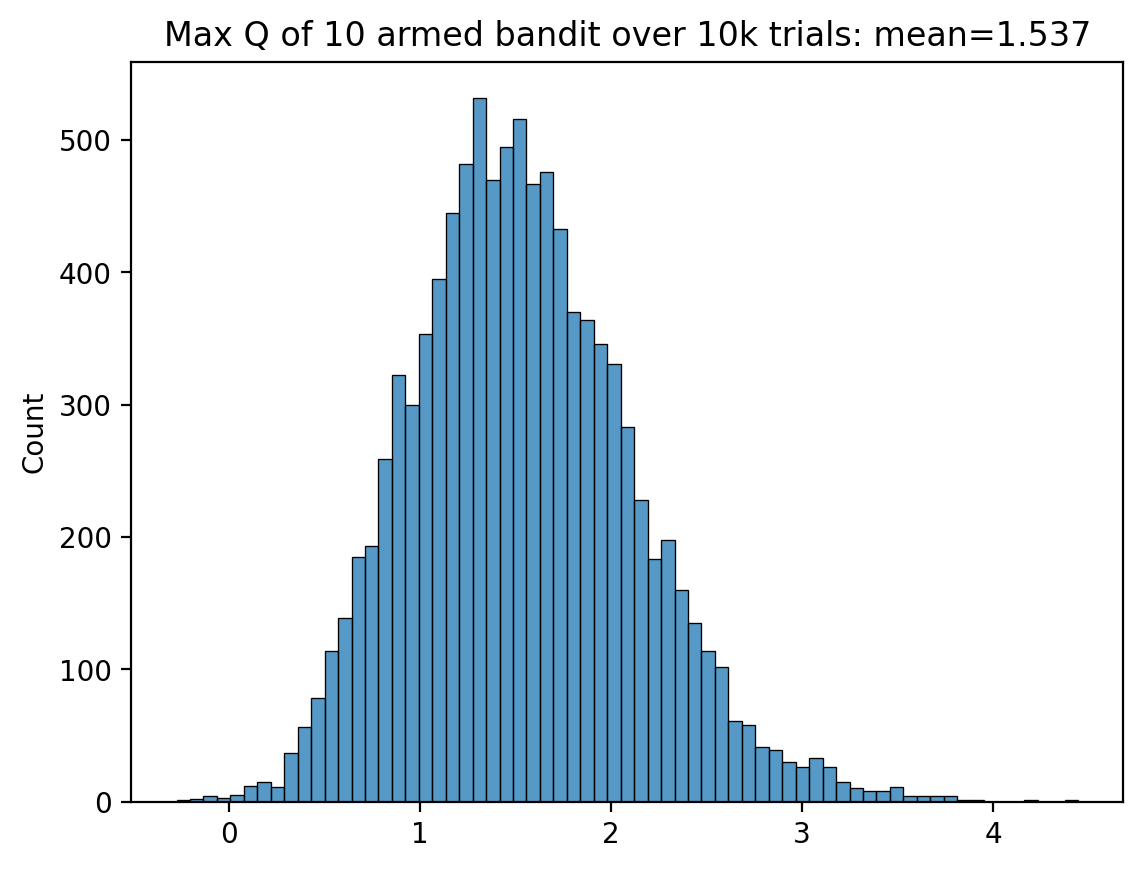

In [8]:
sns.histplot(maxv)
mave = np.mean(maxv)
plt.title(f"Max Q of 10 armed bandit over 10k trials: mean={mave:.3f}")
plt.show()

## Task 2: Experiment and Analysis

### Running the Experiments

Now, we will run experiments using different strategies to solve the multi-armed bandit problem. We will compare the performance of the greedy and epsilon-greedy algorithms by plotting the average rewards over time. 

Similar to the previous task, the reward for each arm is drawn from a normal distribution with a mean of 0 and a standard deviation of 1, via the `np.random.normal` function.

Your task is to complete the code below by calling the `egreedy` function that you defined earlier, and perform experiments with **three** different epsilon values for the epsilon-greedy strategy. Your list of epsilon values should include 0 (greedy strategy) and two other values of your choice that are in the range $\epsilon \in (0, 0.3]$.

You can expect this cell to take at least 1 minute to run.

In [9]:
from bandits import empirical_egreedy

data = []
epsilon_values = [0, 0.01, 0.1]
for epsilon in epsilon_values:
    rewards = empirical_egreedy(epsilon, n_trials, n_arms, n_plays)
    df = pd.DataFrame(rewards).reset_index().melt(id_vars=["index"])
    df.rename(columns={"index": "trials", "variable": "plays", "value": "reward"}, inplace=True)
    if epsilon == 0:
        df["epsilon"] = "greedy"
    else:
        df["epsilon"] = f"$\\epsilon={epsilon}$"
    data.append(df)
alldata = pd.concat(data)

### Visualization of Strategy Performance

We can visualize and compare the performance of different strategies by running the cell below. This might take a little more than 2 minutes to run.

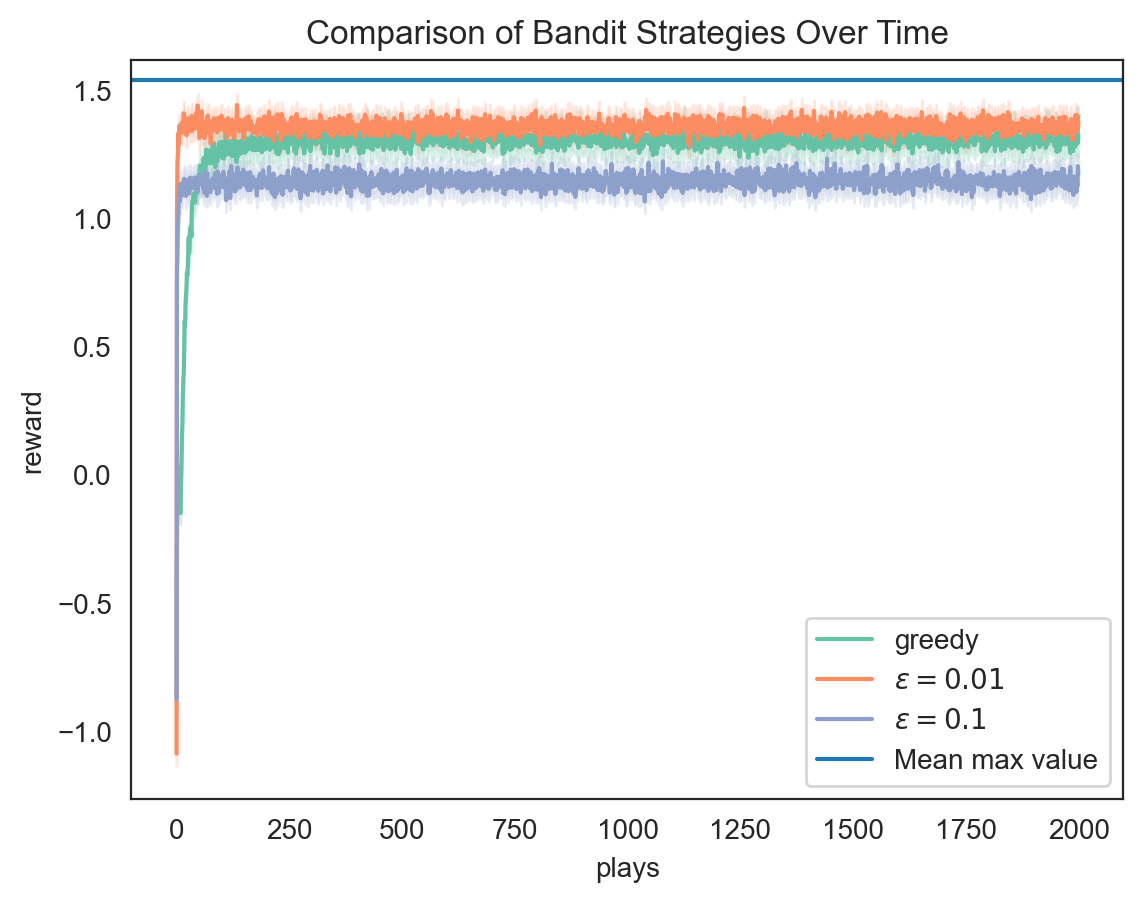

In [10]:
sns.set_style("white")
sns.lineplot(data=alldata, x="plays", y="reward", hue="epsilon", palette="Set2")
plt.axhline(mave, label="Mean max value")
plt.legend()
plt.title("Comparison of Bandit Strategies Over Time")
plt.show()

### Early Performance Analysis

We can analyze the early game performance using line plots for smaller number of plays. Plot the initial 100 plays of each trails for each epsilon values.

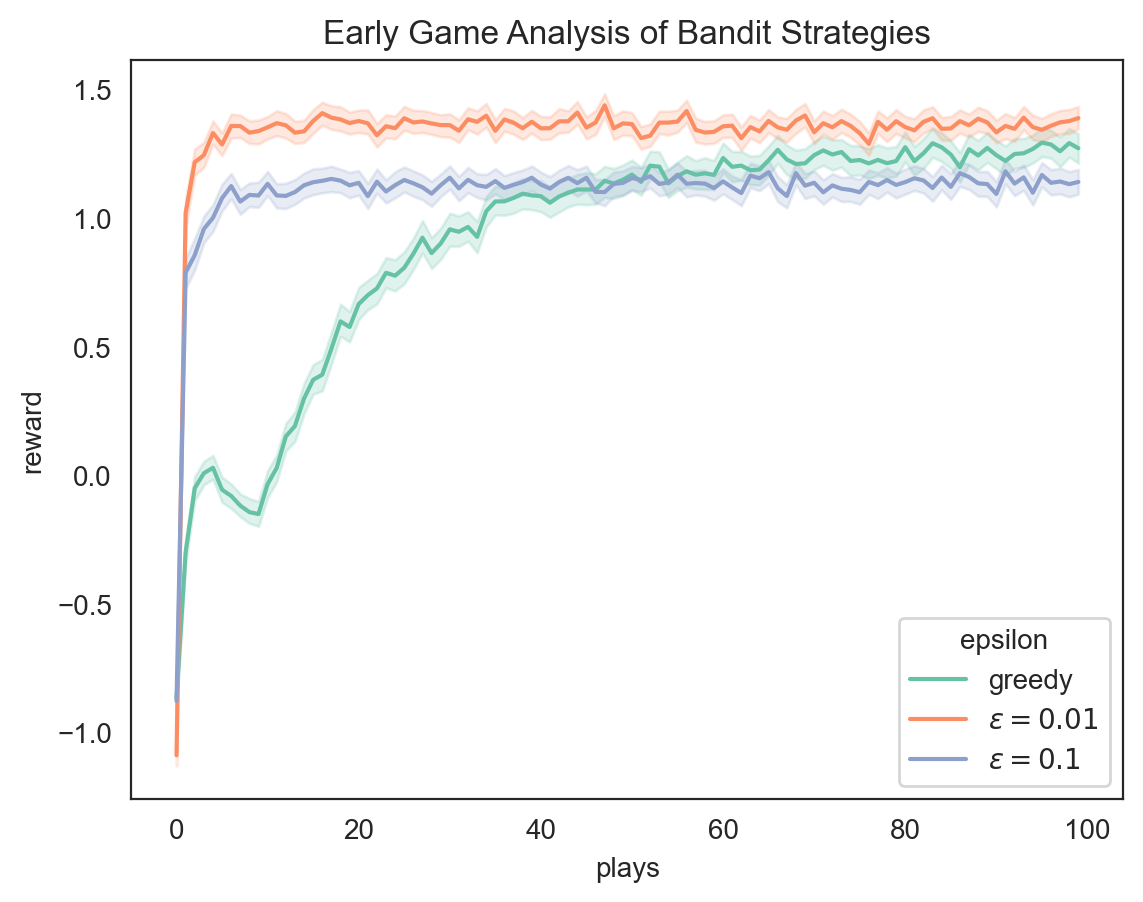

In [12]:
# YOUR CODE HERE

plt.title("Early Game Analysis of Bandit Strategies")
sns.lineplot(data=alldata[alldata["plays"] < 100], x="plays", y="reward", hue="epsilon", palette="Set2")
plt.show()

## Task 3: Visualizing Bandit Strategies for a Slot Machine Simulator

The next part of this assignment involves using `slot_machine.py`. You will work with a simple slot machine simulator that models a multi-armed bandit problem using the $\epsilon$-greedy algorithm. The goal is to maximize your rewards by selecting slot machines based on past rewards and an exploration strategy that balances the trade-off between exploiting the best-known machine and exploring other machines.

**Note**: for this part, you will need to run the code in a local environment with a graphical interface (e.g., your local machine), similar to how you did L2 and L3. The code will not run in the notebook environment.

### Problem Statement
You are faced with `n` slot machines, each with a different probability of paying out a reward. These probabilities are unknown to you at the start. You can play one machine per round, and each play has a cost. Your objective is to maximize your net rewards over a series of plays.

### Environment Setup
The simulator is set up using Pygame, a popular library for writing video games in Python. The environment consists of:

- **n_machines**: Number of slot machines.
- **true_rewards**: Array storing the true probability of each machine giving a reward.
- **estimated_rewards**: Array to maintain our estimates of each machine's reward probabilities.
- **play_counts**: Array tracking how many times each machine has been played.
- **cost_per_play**: Cost incurred each time a machine is played.
- **total_reward**: Net reward accumulated over all plays.
- **epsilon**: Probability of choosing to explore (i.e., selecting a machine at random).

### Code Structure
The code is organized as follows:

- **Initialization**: Set up the Pygame environment, define screen dimensions, colors, fonts, and initialize game settings.
- **Game Loop**:
  - **Event Handling**: Process mouse clicks for selecting machines in manual mode.
  - **AI Mode Logic**: Implement the epsilon-greedy algorithm to select which machine to play based on the estimated rewards and exploration factor.
  - **Reward Calculation**: Update the total rewards based on the machine's payout and the cost per play.
  - **Display Updates**: Render the slot machines, number of plays, and total rewards on the screen.

## Tasks to Complete
To complete this assignment, you need to fill in the missing parts of the code that are marked with `# TODO`. The main tasks are as follows:

1. **Update Estimated Rewards**: After playing a machine, update your estimate of its reward probability based on the outcome.
2. **Implement Epsilon-Greedy Selection**:Randomly decide (based on epsilon) whether to explore (choose a machine randomly) or exploit (choose the best-known machine).
3. **Simulate Reward Collection:** Simulate obtaining a reward from the chosen machine based on its true reward probability.
4. **Update Play Counts and Total Reward:** Update the count of plays for the selected machine and adjust the total reward based on whether the machine paid out.
5. **Incremental Update Formula:** Use the incremental update formula to update the estimated reward probability after each play.

Before you begin the assignment, you can get a feel of how the game works by running the code in "manual mode" and playing a few rounds, as follows:

```bash
python slot_machine.py --mode manual
```

This will open a window with the slot machines, and you can click on the machines to begin accumulating reward. The game will display the number of plays on each machine and the total reward. 

After you implement the TODOs in the code, you can then run the game in "AI mode" to see how the $\epsilon$-greedy algorithm performs:

```bash
python slot_machine.py --mode AI --epsilon 0.1
```

Think about how the algorithm balances exploration and exploitation as you observe the game in action. You can also experiment with different values of $\epsilon$ to see how it affects the agent's behavior. Does the AI mode perform better than the manual mode? Why or why not?

## Submission

Submit `bandits.py` and `slot_machine.py` to gradescope.